## Perth Basin Case Study using Loop2Flopy

In [1]:
import numpy as np
import pandas as pd
import numbers

### Importing Borehole Data

In [2]:
bore_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "bore_info")
strat_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "strat_info")
bore_info

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.0,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.0,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.0,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.0,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.0,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,387523.0,6403674.0,PRAMS Formation Picks,AM65,2.0,9,57,-,-,-,...,-,69,188,208,-,-,-,-,-,363
408,403632.0,6402890.0,PRAMS Formation Picks,AM69,41.0,2,-,-,-,-,...,-,-,60,-,-,-,-,-,-,417
409,382835.0,6402182.0,PRAMS Formation Picks,AM67,11.0,21,44,-,-,-,...,-,96,186,246,-,-,-,-,-,375
410,390782.0,6398413.0,PRAMS Formation Picks,AM68,9.0,8,58,-,-,-,...,-,80,176,203,287,-,-,-,-,327


### Filter data
Crop to desired area and delete columns of less than 2 data points

In [3]:
df = bore_info.copy()
#x0, x1, y0, y1, z0, z1 = 355000, 402000, 6522000, 6534000, -1200, 200 
x0, x1, y0, y1, z0, z1 = 355000, 402000, 6503000, 6532000, -1200, 200 
, -1200, 200 # Whole Block
df = df.loc[(df['Northing'] >= y0)] 
df = df.loc[(df['Northing'] <= y1)]
#df = df.loc[(df['Easting'] <= x1)]
df = df.drop(['Source'], axis=1)
#df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
# I think we need to keep this general so that we can apply it everywhere...
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,356924.0,6531829.0,AM1,53.00,99,-,-,-,-,157,...,222,499,505,517,-,680,-,-,-,-
1,396539.0,6531749.0,GG85,100.00,-,-,-,-,-,-,...,79,-,-,-,-,-,-,-,-,-
2,395149.0,6531407.0,GB5,103.00,2,-,-,-,-,-,...,18,82,-,-,-,380,451,514,517,-
3,401021.0,6531105.0,MCK1,127.00,5,-,-,-,-,-,...,180,270,-,-,-,-,-,-,-,-
4,401258.0,6530836.0,GB1,117.00,14,-,-,-,-,-,...,184,316,-,-,-,-,-,-,-,-
5,400739.0,6530349.0,MART2,170.00,2,-,-,-,-,-,...,188,-,-,-,-,-,-,-,-,-
6,365646.0,6529649.0,AM2,36.00,61,-,-,-,-,96,...,220,605,775,803,829,-,-,-,881,-
7,386985.0,6529614.0,AM6,64.00,28,-,-,-,-,-,...,-,80,-,-,-,-,-,-,300,-
8,398539.0,6529149.0,DELE,155.00,2,-,-,-,-,-,...,138,254,-,-,-,-,-,-,-,-
9,398539.0,6528649.0,GASB,115.00,-,-,-,-,-,-,...,108,189,-,-,-,-,-,-,-,-


<bound method NDFrame.keys of      Easting   Northing     ID  Ground       TQ   Tr  Tkm   Tk  Tkc  Kcl  ...  \
0   356924.0  6531829.0    AM1   53.00       99    -    -    -    -  157  ...   
1   396539.0  6531749.0   GG85  100.00        -    -    -    -    -    -  ...   
2   395149.0  6531407.0    GB5  103.00        2    -    -    -    -    -  ...   
3   401021.0  6531105.0   MCK1  127.00        5    -    -    -    -    -  ...   
4   401258.0  6530836.0    GB1  117.00       14    -    -    -    -    -  ...   
5   400739.0  6530349.0  MART2  170.00        2    -    -    -    -    -  ...   
6   365646.0  6529649.0    AM2   36.00       61    -    -    -    -   96  ...   
7   386985.0  6529614.0    AM6   64.00       28    -    -    -    -    -  ...   
8   398539.0  6529149.0   DELE  155.00        2    -    -    -    -    -  ...   
9   398539.0  6528649.0   GASB  115.00        -    -    -    -    -    -  ...   
10  372107.1  6528279.3   AM76   31.57       59    -    -    -    -    -  ...  

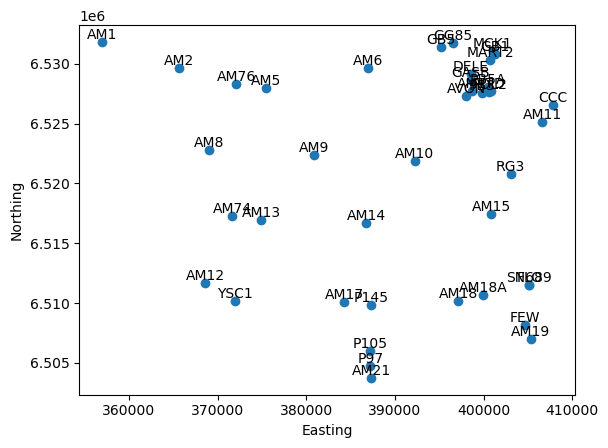

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print(df.keys)

# Plan of data points
plt.scatter(df.Easting, df.Northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
i = 0
for (xi, yi) in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va='bottom', ha='center')
    i += 1
#plt.plot([fx1, fx2], [fy1, fy2])
#plt.plot(fault_center[0], fault_center[1], 'o')
#plt.xlim(x0,x1)
#plt.ylim(y0,y1)

In [5]:
lithcodes = list(df.columns.values[3:])         # Make a list of formations  
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
print(lithcodes)

['Ground', 'TQ', 'Tr', 'Tkm', 'Tk', 'Tkc', 'Kcl', 'Kcp', 'Kcg', 'Kcm', 'Kcom', 'Kcok', 'Kcoh', 'Kwlp', 'Kwlw', 'Kwlm', 'Kws', 'Kwg', 'Kpc', 'Kps', 'Kpo', 'Jy', 'Jc']


In [6]:
strat = []
vdum = [38,
        -10,
        -52,
        -124,
        -320,
        -385,
        -435,
        -463,
        -472,
        -494,
        -549,
        -591,
        -619,
        -666,
        -822,
        -881,
        -963,
        -1043,
        -1818,
        -2090,
        -2148,
        -3148,
        -4148]

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i-1
    val = vdum[i]
    sequence = strat_info.loc[strat_info['unit'] == lith, 'sequence'].item()
    R = strat_info.loc[strat_info['unit'] == lith, 'R'].item()/255
    G = strat_info.loc[strat_info['unit'] == lith, 'G'].item()/255
    B = strat_info.loc[strat_info['unit'] == lith, 'B'].item()/255
    strat.append([index, lithid, lith, sequence, val, [round(R,2),round(G,2),round(B,2)]])
strat = pd.DataFrame(strat)
strat.columns =['index','lithid','lithcode','sequences','vals','color']
strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,38,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,-10,"[1.0, 1.0, 0.0]"
2,2,1,Tr,Tertiary,-52,"[0.73, 0.6, 0.58]"
3,3,2,Tkm,Tertiary,-124,"[1.0, 0.6, 0.2]"
4,4,3,Tk,Tertiary,-320,"[1.12, 0.32, 0.16]"
5,5,4,Tkc,Tertiary,-385,"[1.0, 0.6, 0.2]"
6,6,5,Kcl,Coolyena,-435,"[0.67, 0.8, 0.0]"
7,7,6,Kcp,Coolyena,-463,"[0.77, 0.84, 0.61]"
8,8,7,Kcg,Coolyena,-472,"[0.67, 0.85, 0.6]"
9,9,8,Kcm,Coolyena,-494,"[0.67, 0.78, 0.71]"


### Make lithology table for Loop

In [7]:
#Okay, let me vocalise, or type, what is in my mind...
# So we treat the four parts as their own thing...
# then we make the unconformities feature names....
#Also, on the phone with JP, he said the last number is the end of hole (EOH) 


data_list = df.values.tolist()             # Turn data into a list of lists
formatted_data = []
for i in range(len(data_list)): #iterate for each row
    end = False
    # okay, first we will establish the max value (i.e. the end of the hole)
    stuff = []
    for j in range(3,25,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            stuff.append(data_list[i][j])
            
    EOH = max(stuff)
    print(EOH)
        
    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]    
    # First channp.nan, np.nan, np.nange - we can get the norms from the geophys data...
    gx, gy, gz =0., 0.,1.
        
    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append([boreid, easting, northing, groundlevel, val, 'Ground', 'Quaternary', gx, gy, gz]) #eventually we cn get this from a dem...
    current_bottom = np.copy(groundlevel)
    
    #okay... lets see if the TQ boundary exists... 
    # JP question - Say in SN786, how you have logged it, do you mean the Pinjar is at the surface?
    #thought 2 - we will just have a DEM eventaully I imagine... so ground could be an unconformity if we have something other than TQ at the surface?
    # but in the current framework:
    if isinstance(data_list[i][4], numbers.Number) == True:
        bottom    = groundlevel - float(data_list[i][4])  # Ground surface - TQ (mbgl)
        val       = strat.vals[1]                      # designated isovalue
        lithid    = lithcodes[1]                       # lithology id 
        feat_name = strat.sequences[1]                 # sequence name
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])
        current_bottom = np.copy(bottom)
    
    # I know, I know, there isn't any of the tertiary one here, but in being thorough...
    
    for j in range(5,9,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue
                end = True
                                          
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)

                                   
    # Teriary unconformity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Tert_base'
        feat_name = 'Tertiary_unconformity'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])
                                          
    # Fighting, out of the perth Basin by way of San Jose Calfornia: The Coolyeena Formation!!!!
    
    for j in range(9,16,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)                                          
                                          
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.  
        lithid = 'Cool_base'
        feat_name = 'CoolUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])     
                                          
    for j in range(16,21,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)  
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Warn_base'
        feat_name = 'WarnUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])  
        
    gx, gy, gz = 0., 0., 1.
    for j in range(21,26,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)  

data = pd.DataFrame(formatted_data)
data.columns =['ID','X','Y','Z','val','lithcode','feature_name', 'gx', 'gy', 'gz']


680
100.0
517
270
316
188
881
300
254
189
647
317
302
721
180
267
171
231
244
810
810
303
298
201
784
405
798
810
838
253
259
676
504
300
301
206
154
802
198
400
464


#### Fault stuff

In [8]:
#The Bado
fx1, fx2 = 373786, 373439
fy1, fy2 = 6528191,6517059
fz = -800 #[-200,-500]

fault_azimuth = 90 - np.rad2deg(np.arctan(np.abs(fy2-fy1)/np.abs(fx2-fx1)))
fault_center = [fx1 + (fx2 - fx1)/2, fy1 + (fy2 - fy1)/2, fz]
fault_max_disp =500. # 200? 
fault_slip_vector=[0,0,1]
major_axis = 100000#np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
minor_axis = 100000 # Fault_influence - orthogonal to fault
intermediate_axis = 0 # fault_vertical_radius
strike, dip = fault_azimuth, 270

# Make cloud of points along fault plane
nh = 20 # points  in x/y plane
x_array, y_array = [], [] # arrays to create points along fault
x_array.append(fx1)
y_array.append(fy1)
for i in range(nh-2):
    x_array.append(fx1 + (i+1) * (fx2-fx1)/(nh-1))
    y_array.append(fy1 + (i+1) * (fy2-fy1)/(nh-1))  
x_array.append(fx2)
y_array.append(fy2)

z_array = np.arange(-1000, 0, 50) 
nv = len(z_array) # points in z plane                                                                       

from LoopStructural.utils.helper import strike_dip_vector
nx, ny, nz = strike_dip_vector([strike], [dip])[0]
print(nx,ny,nz)

fault_plane_3d = []
for v in range(nv):# vertical points 
    for h in range(nh): # horizontal points
        x, y, z = x_array[h], y_array[h], z_array[v]
        fault_plane_3d.append((x,y,z))
        df_new_row = pd.DataFrame.from_records({'X':[x], 'Y':[y], 'Z':[z], 'val':[0.], 'feature_name':['Fault'], 'nx': [nx], 'ny': [ny], 'nz': [nz]})
        data = pd.concat([data, df_new_row], ignore_index = True)
        
## ADD FAULT (this chunk given to me directly by Lachlan Grose to make an ellipsoid fault)
from LoopStructural.modelling.features.fault._fault_function import CubicFunction, FaultDisplacement, Composite
hw = CubicFunction()
hw.add_cstr(0, 1)
hw.add_grad(0, 0)
hw.add_cstr(1, 0)
hw.add_grad(1, 0)
hw.add_max(1)
fw = CubicFunction()
fw.add_cstr(0, -1)
fw.add_grad(0, 0)
fw.add_cstr(-1, 0)
fw.add_grad(-1, 0)
fw.add_min(-1)
gyf = CubicFunction()
gyf.add_cstr(-1, 0)
gyf.add_cstr(1, 0)
gyf.add_cstr(-0.2, 1)
gyf.add_cstr(0.2, 1)
gyf.add_grad(0, 0)
gyf.add_min(-1)
gyf.add_max(1)
gzf = CubicFunction()
gzf.add_cstr(-1, 0)
gzf.add_cstr(1, 0)
gzf.add_cstr(-0.2, 1)
gzf.add_cstr(0.2, 1)
gzf.add_grad(0, 0)
gzf.add_min(-1)
gzf.add_max(1)
gxf = Composite(hw, fw)
fault_displacement = None
fault_displacement = FaultDisplacement(gx=gxf, gy=gyf, gz=gzf)
faultfunction = fault_displacement

-0.9995145257373308 0.031156264860838546 -1.8369701987210297e-16


In [9]:
for lith in lithcodes:
    filtered_df = data[data.lithcode == lith] 
    print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])

filtered_df = data[data.lithcode == 'Tert_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Cool_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Warn_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])


 Lithology =  Ground 

         ID         X          Y      Z   val lithcode feature_name   gx   gy  \
0      AM1  356924.0  6531829.0   53.0  38.0   Ground   Quaternary  0.0  0.0   
13    GG85  396539.0  6531749.0  100.0  38.0   Ground   Quaternary  0.0  0.0   
18     GB5  395149.0  6531407.0  103.0  38.0   Ground   Quaternary  0.0  0.0   
29    MCK1  401021.0  6531105.0  127.0  38.0   Ground   Quaternary  0.0  0.0   
39     GB1  401258.0  6530836.0  117.0  38.0   Ground   Quaternary  0.0  0.0   
48   MART2  400739.0  6530349.0  170.0  38.0   Ground   Quaternary  0.0  0.0   
57     AM2  365646.0  6529649.0   36.0  38.0   Ground   Quaternary  0.0  0.0   
72     AM6  386985.0  6529614.0   64.0  38.0   Ground   Quaternary  0.0  0.0   
79    DELE  398539.0  6529149.0  155.0  38.0   Ground   Quaternary  0.0  0.0   
89    GASB  398539.0  6528649.0  115.0  38.0   Ground   Quaternary  0.0  0.0   
96    AM76  372107.1  6528279.3  31.57  38.0   Ground   Quaternary  0.0  0.0   
105   PB5A  400

In [10]:
fault_displacement

### Create Geomodel

In [11]:
from LoopStructural import GeologicalModel
origin  = (x0, y0, z0)
maximum = (x1, y1, z1)
geomodel = GeologicalModel(origin, maximum)
geomodel.data = data

### Add surfaces

In [12]:
Quaternary = geomodel.create_and_add_foliation("Quaternary", nelements=1e4)
#QuatUC     = geomodel.add_unconformity(Quaternary, strat.vals[1]) # Clips above #(UC0)

Coolyena = geomodel.create_and_add_foliation("Coolyena",nelements=1e4)

CoolUC   = geomodel.create_and_add_foliation("CoolUC",nelements=1e4)


Fault = geomodel.create_and_add_fault('Fault', 
                                      displacement = fault_max_disp,
                                      fault_slip_vector= fault_slip_vector,
                                      #fault_center = fault_center,
                                      minor_axis = minor_axis, # fault_influence
                                      #major_axis = major_axis, # fault_extent
                                      #intermediate_axis = intermediate_axis, # fault_vertical_radius
                                      #aultfunction = faultfunction, #faultfunction in routines.ipynb
                                      #nelements=4000, steps=4, interpolatortype="FDI", buffer=0.3, solver='pyamg',
                                      force_mesh_geometry = False
                                      )  




Warnbro = geomodel.create_and_add_foliation("Warnbro",nelements=1e4)



WarnUC = geomodel.create_and_add_foliation("WarnUC",nelements=1e4)

Yarragadee = geomodel.create_and_add_foliation("Yarragadee",nelements=1e4)

geomodel.update()


print(data.feature_name.unique())

Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region


C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\builders\_fault_builder.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask, ["nx", "ny", "nz"]] /= np.linalg.norm(
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\builders\_fault_builder.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask, ["nx", "ny", "nz"]] /= minor_axis * 0.5
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packa

  0%|          | 0/9 [00:00<?, ?it/s]

['Quaternary' 'Tertiary_unconformity' 'Coolyena' 'CoolUC' 'Warnbro'
 'WarnUC' 'Yarragadee' 'Tertiary' 'Fault']


### Add Stratigraphy Column

### 2D View

In [13]:
y_transects = [6505000, 6514000, 6528279]
delx, delz = 100, 100
x, z = np.linspace(x0,x1,delx), np.linspace(z0,z1,delz)
xx, zz = np.meshgrid(x,z)
yy = np.zeros_like(xx)
yy[:] = 6529649
#X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals1 = geomodel.evaluate_feature_value("Quaternary",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals2 = geomodel.evaluate_feature_value("Coolyena",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals3 = geomodel.evaluate_feature_value("CoolUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals4 = geomodel.evaluate_feature_value("Warnbro",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals5 = geomodel.evaluate_feature_value("WarnUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals6 = geomodel.evaluate_feature_value("Yarragadee",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

#plt.imshow(vals2)

dum = np.ones_like(vals4)*-10000
dum[vals5<0] = vals6[vals5<0]
dum[vals5>0] = vals4[vals5>0]
dum[vals3>0] = vals2[vals3>0]
dum[vals1>-10] = vals1[vals1>-10]

Lith = np.ones_like(dum)*-1
for i in range(len(vdum)-2,-1,-1):
    Lith[dum>vdum[i]] = i


Text(0, 0.5, 'z mAHD)')

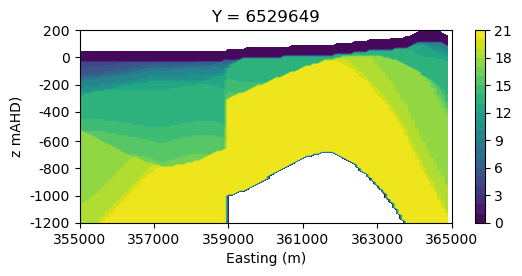

In [14]:
#plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(6,2.5))
plt.contourf(Lith,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.colorbar()
plt.title("Y = 6529649")
plt.xticks([0,20,40,60,80,100],[x0,x0+2000,x0+4000,x0+6000,x0 + 8000, x0 + 10000])
plt.xlabel('Easting (m)')
yticks  = []
yvals = [-1200,-1000,-800,-600,-400,-200,0,200]
for ydum in yvals:
    n = np.argmin(abs(ydum-z))
    yticks.append(n)
plt.yticks(yticks,yvals)
plt.ylabel('z mAHD)')